# PROPOSAL - Wine Quality Data Set

<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large186.jpg" width = "100"/>


##### Introduction:
- Those who avidly drink wine take pride in understanding the different types and aspects of it and often are quite selective on the certain types of wine they choose to drink. Because the nature of wine can change quite differently depending on its ingredients and the specific way it is brewed, the concern of grading the quality of a type of wine is very important as it ultimately determines how likely someone will consume a certain type of wine. Our project proposal is looking to be able to determine the specific category of wine quality for red wine samples and more specifically, if we are able to accurately grade the wine quality of different samples of red wine based off of their four most relevant ingredients. The parameters we will be using to determine the classification of “wine quality” as defined by Cortez et al. is a continuous integer-based scale with 0 being very bad quality and 10 being excellent quality of wine. To carry out this procedure we decided to use the “Wine Quality Data Set” which shows numerous observations of red wine with 11 columns attached with a final column being used to show the wine quality score given.

##### Methods:
- This is a classification process because we are predicting categorical values. Firstly, we will split our dataset into a training and testing set. The variables we will use as predictors will be sulphates, pH, total sulfur dioxide and alcohol. The reason we will be looking at these columns as predictors is accord to their study (Cortez et al), those are the four most relevant factors in determining the quality for red wine. We will be grading the success of our classifier based off its accuracy to correctly predict which category of wine quality each observation of red wine belongs to from our testing set. We’ll use cross validation to get the best estimate of accuracy for our classifier so we can know which parameters work the best. We’ll show a visual representation of this in the form of a line graph, highlighting the different estimate accuracies in relation to the amount of neighbors we use. Finally we’ll use the best parameter to see if our classifier can accurately predict the wine quality based on these 4 predictors.

##### Expected outcomes and significance:
- We are expecting that that there will be a good chance our classifier isn’t very accurate and this is due to the fact that although the 4 predictors chosen are the 4 most relevant, the remaining variables are still collectively important to effectively predict the quality of red wine. The findings we have will be impactful as it will give consumers and your average wine connoisseurs a better understanding of what to place higher emphasis on when grading wine quality and ultimately looking for which wine to buy. These findings could potentially lead to questions such as “Is it valid to use objective quantitative data as a means of determining an ultimately subjective classification?”

Study the dataset comes from - Modeling wine preferences by data mining from physicochemical properties - Paulo Cortez, António Cerdeir, Fernando Almeida, Telmo Matos, José Reis https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub

#### Preliminary exploratory data analysis:

Firstly, load the library.

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Read the dataset from the web**,
<br> randomly select 10 rows to observe the dataframe.

In [2]:
wine_data <- read_csv2("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv") 
slice_sample(wine_data, n = 10)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
85,0.28,0.56,18,0.092,35,103,0.9969,33,0.75,105,7
72,0.53,0.14,21,0.064,15,29,0.99323,335,0.61,121,6
78,0.56,0.12,2,0.082,7,28,0.997,337,0.5,94,6
89,0.59,0.39,23,0.095,5,22,0.9986,337,0.58,103,5
73,0.69,0.32,22,0.069,35,104,0.99632,333,0.51,95,5
69,0.74,0.03,23,0.054,7,16,0.99508,345,0.63,115,6
59,0.55,0.1,22,0.062,39,51,0.99512,352,0.76,112,6
67,0.675,0.07,24,0.089,17,82,0.9958,335,0.54,101,5
93,0.43,0.44,19,0.085,9,22,0.99708,328,0.55,95,5


**In our dataset, we can see there are only 2 rows that have missing data. We then choose to remove these incomplete cases from the dataframe using `na.omit`.**

In [3]:
wine_data[!complete.cases(wine_data),]
wine_data <- na.omit(wine_data)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
66,0.63,0,43,0.093,51,NA,0.99558,32,0.45,95,5
66,0.63,0,43,0.093,51,NA,0.99558,32,0.45,95,5


**In addition, we use `make.names` to replace column names that contain empty spaces with a `.`. This will allow us use our tidyverse functions more conveniently.**

In [4]:
colnames(wine_data) <- make.names(colnames(wine_data))
slice(wine_data, 1)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5


**Based on our introduction, we will select the column of which are the four most relevant factors in determining the quality for red wine.**

In [5]:
wine_data <- select(wine_data, sulphates, pH, total.sulfur.dioxide, alcohol, quality)
slice_sample(wine_data, n = 10)

sulphates,pH,total.sulfur.dioxide,alcohol,quality
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0.56,343,64,112,6
0.55,34,18,96,6
0.67,329,21,10,5
0.51,329,28,99,6
0.73,367,29,96,5
0.67,316,21,97,6
0.75,33,103,105,7
0.68,345,16,115,6
0.7,3,22,93,6


**We then used `mutate` to convert all predictors into numeric data; convert target variable to a factor using `as_factor`.**

In [6]:
wine_data <- wine_data |> 
  mutate(across(sulphates:alcohol, as.numeric)) |>
  mutate(quality = as_factor(quality))

slice(wine_data, 1)

sulphates,pH,total.sulfur.dioxide,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.56,351,34,94,5


**After tidying our data to a format that is suitable for analysis, we continue to next step by 
focusing specifically on the training data.**
<br> We choose to split 75% of our original data set into the training set.

In [7]:
set.seed(1)

wine_split <- initial_split(wine_data, prop = 0.75, strata = quality)  
wine_train <- training(wine_split)   
wine_test <- testing(wine_split)

**Since all of the predictor variables contains quantitaive data, we used `group_by` to separate each class label, and found the mean of each predictor variable under each class label using `summarize` + `across`.**

In [8]:
wine_train_avg <- wine_train |> 
  group_by(quality) |>
  summarize(across(sulphates:alcohol, mean))

wine_train_avg

quality,sulphates,pH,total.sulfur.dioxide,alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.5633333,238.8333,27.16667,1.020000e+02
4,0.6040476,271.3810,36.83333,1.045476e+02
5,0.6189980,301.1179,56.48919,9.110413e+01
6,0.6748626,298.5476,41.58562,4.398872e+12
7,0.7351678,301.1611,35.87248,1.063221e+02
8,0.7647059,293.5294,33.70588,9.052941e+01


**We can also find the mean of all predictor variables.**

In [9]:
wine_train_avg2 <- wine_train |> 
summarize(across(sulphates:alcohol, mean))

wine_train_avg2

sulphates,pH,total.sulfur.dioxide,alcohol
<dbl>,<dbl>,<dbl>,<dbl>
0.6568311,298.6421,46.86538,1.739688e+12


**Next, we use `group_by` + `summarize` to find out the distribution of each of our target variable (quality).**

In [10]:
target <- wine_train |>
    group_by(quality) |>
    summarize(n = n())
target

quality,n
<fct>,<int>
3,6
4,42
5,509
6,473
7,149
8,17


**We can also use a bar graph to plot the distribution:**

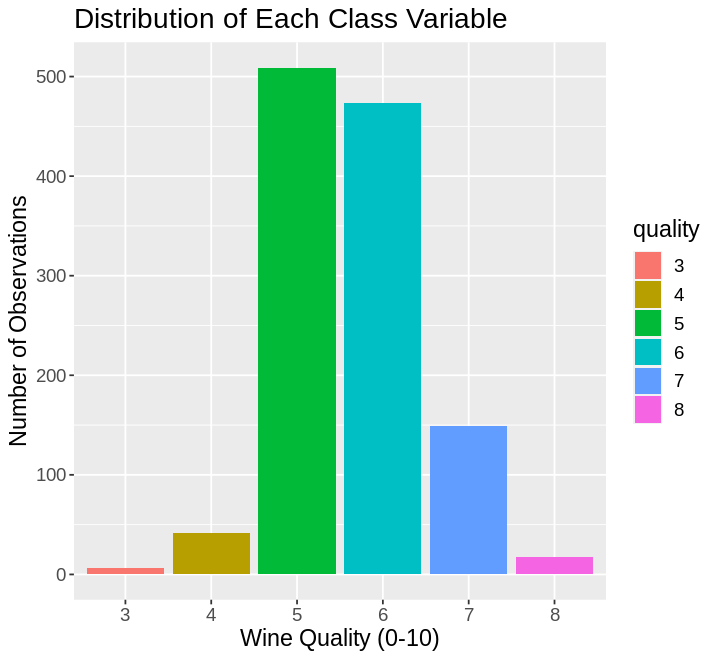

In [11]:
options(repr.plot.width = 6, repr.plot.height = 5.5)

plot <- ggplot(target, aes(x = quality, y = n, fill = quality)) +
  geom_bar(stat = "identity") +
  labs(x = "Wine Quality (0-10)", y = "Number of Observations") +
  ggtitle("Distribution of Each Class Variable") +
  theme(text = element_text(size = 14))
plot


A potential issue in our data set for a classifier is class imbalance, since the label 5 and 6 are much more common than other classes. In our final project, we will add an oversampling step to the recipe with the `step_upsample` function from the `themis` R package. By oversampling the rare class, we can give them more voting power to in the K-nearest neighbor algorithm.

In [12]:
install.packages("themis")
library(themis)

wine_recipe <- recipe(quality ~ ., wine_train) |>
  step_upsample(quality, over_ratio = 1, skip = FALSE) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
  prep()
wine_recipe

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Training data contained 1196 data points and no missing data.

Operations:

Up-sampling based on quality [trained]
Scaling for sulphates, pH, total.sulfur.dioxide, alcohol [trained]
Centering for sulphates, pH, total.sulfur.dioxide, alcohol [trained]

In [13]:
upsampled_wine <- bake(wine_recipe, wine_train)

upsampled_wine |>
  group_by(quality) |>
  summarize(n = n())

quality,n
<fct>,<int>
3,509
4,509
5,509
6,509
7,509
8,509


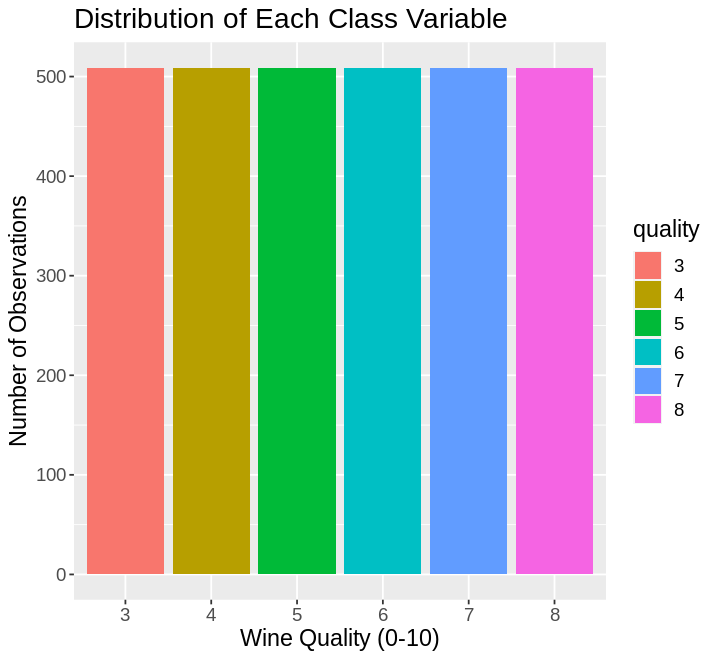

In [14]:
options(repr.plot.width = 6, repr.plot.height = 5.5)

upsampled_wine  |>
  ggplot(aes(quality, fill = quality)) +
  geom_bar() +
  labs(x = "Wine Quality (0-10)", y = "Number of Observations") +
  ggtitle("Distribution of Each Class Variable") +
  theme(text = element_text(size = 14))

### VISUALIZATION

We will compare the distributions of each of the predictor variables with the quality by graphing scatterplots.

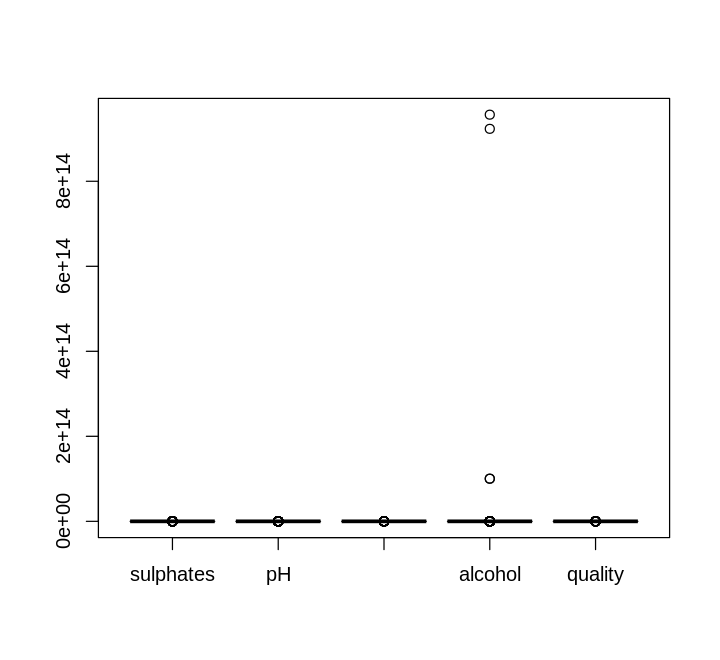

In [15]:
boxplot(wine_train)    

In [16]:

data <- wine_train[,1:5]
dim(data)
 
quartiles <- quantile(data$alcohol, probs=c(0, .90), na.rm = FALSE)
IQR <- IQR(data$alcohol)
 
Lower <- quartiles[1] - 1.5*IQR
Upper <- quartiles[2] + 1.5*IQR 
 
wine_train <- subset(data, data$alcohol > Lower & data$alcohol < Upper)
dim(wine_train)

[1] 1196    5

[1] 1186    5

In [17]:
graph <- ggplot(wine_train, aes(x = quality, y = sulphates, color = quality)) +
geom_jitter(alpha = 0.3) +
xlab("Quality") +
ylab("Sulphates") +
theme(text = element_text(size = 14))

graph1 <- ggplot(wine_train, aes(x = quality, y = pH, color = quality)) +
geom_jitter(alpha = 0.3) +
xlab("Quality") +
ylab("pH") +
theme(text = element_text(size = 14))

graph2 <- ggplot(wine_train, aes(x = quality, y = total.sulfur.dioxide, color = quality)) +
geom_jitter(alpha = 0.3) +
xlab("Quality") +
ylab("Total Sulfur Dioxide")+
theme(text = element_text(size = 14))

graph3 <- ggplot(wine_train, aes(x = quality, y = alcohol, color = quality)) +
geom_jitter(alpha = 0.4) +
xlab("Quality") +
ylab("Alcohol") +
theme(text = element_text(size = 14))

Here we set the $y$ value for alcohol column to be in between 0 to 200 such that outliers that contain unrealistic information are excluded. From doing so we can obtain a better visualization instead of sqeezing dots due to large $y$ range.

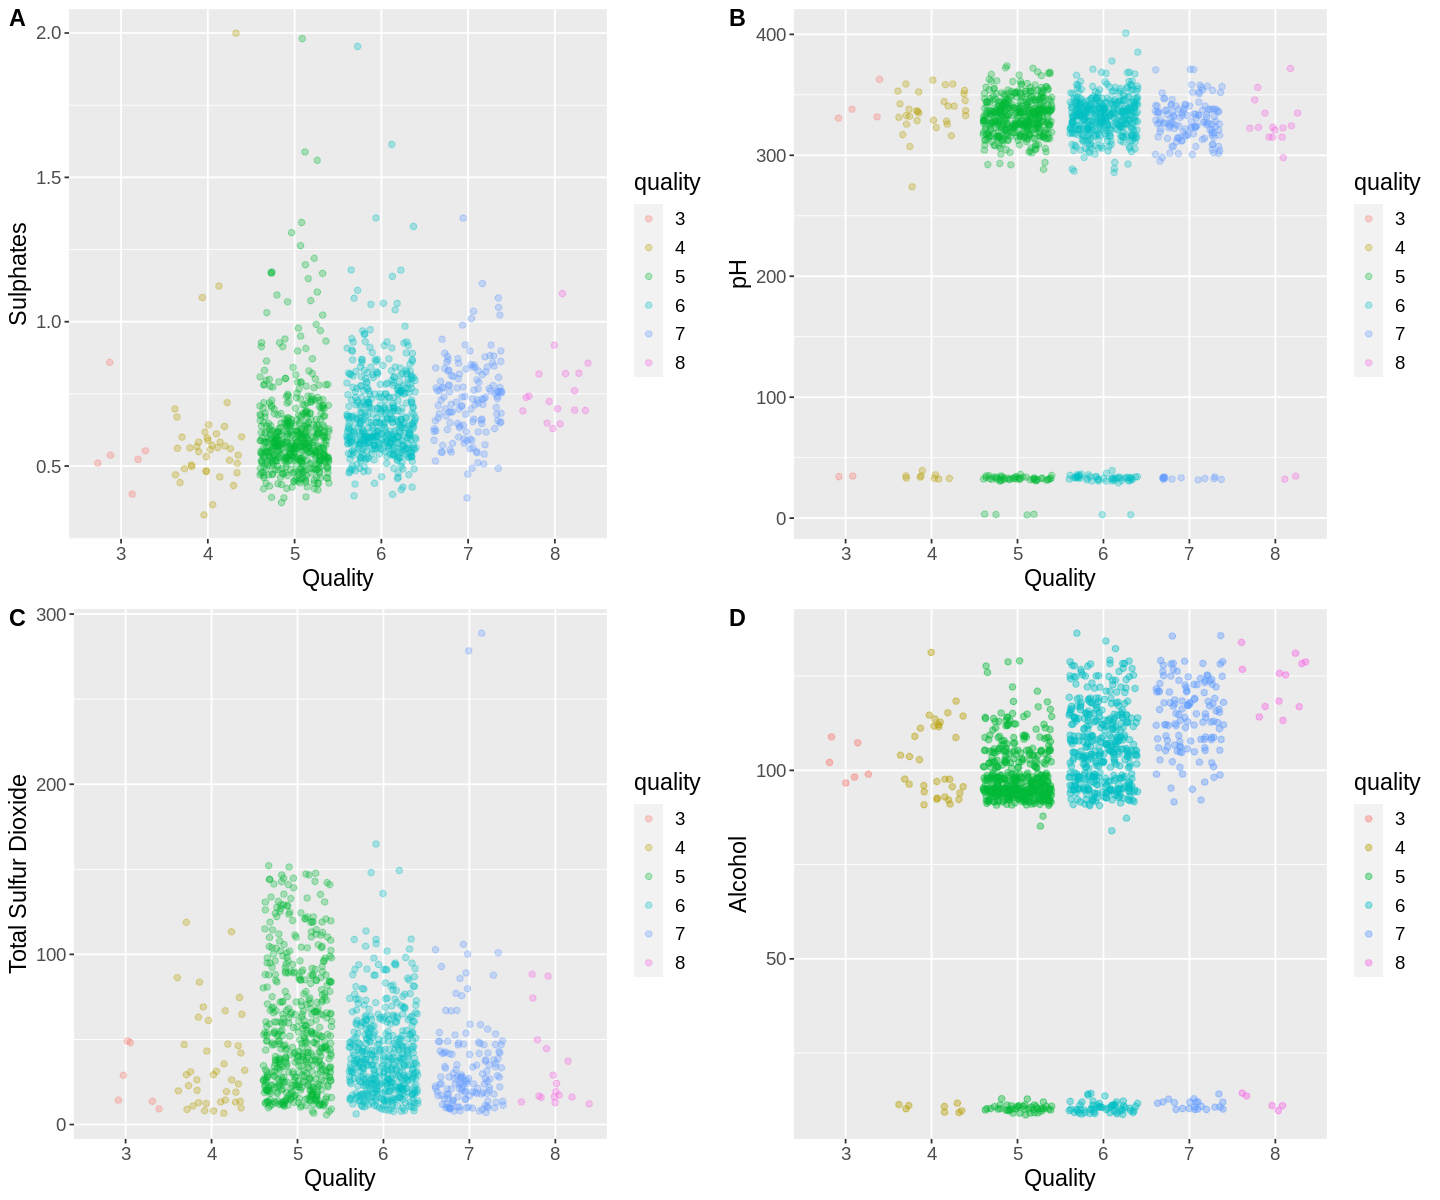

In [18]:
options(repr.plot.width = 12, repr.plot.height = 10)

plot_grid(graph, graph1, graph2, graph3, 
          labels = c("A", "B", "C", "D"), 
          ncol = 2, nrow = 2)

From the scatterplots above, we can observe a general relationship between of predictors and the level of wine quality. 

In [19]:
upsampled_wine_recipe <- recipe(quality ~ ., data = upsampled_wine) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

wine_vfold <- vfold_cv(wine_train, v = 5, strata = quality)
gridvals <- tibble(neighbors = seq(1, 25))

wine_results <- workflow() |>
  add_recipe(upsampled_wine_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = wine_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

wine_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5522642,5,0.007508697,Preprocessor1_Model01
2,accuracy,multiclass,0.5522642,5,0.007508697,Preprocessor1_Model02
3,accuracy,multiclass,0.5606568,5,0.009308168,Preprocessor1_Model03
4,accuracy,multiclass,0.5606712,5,0.007387305,Preprocessor1_Model04
5,accuracy,multiclass,0.5631957,5,0.010016598,Preprocessor1_Model05
6,accuracy,multiclass,0.5682626,5,0.007237382,Preprocessor1_Model06
7,accuracy,multiclass,0.5749960,5,0.007502663,Preprocessor1_Model07
8,accuracy,multiclass,0.5834598,5,0.005122338,Preprocessor1_Model08
9,accuracy,multiclass,0.5834776,5,0.006493853,Preprocessor1_Model09


[1] 0.5910369

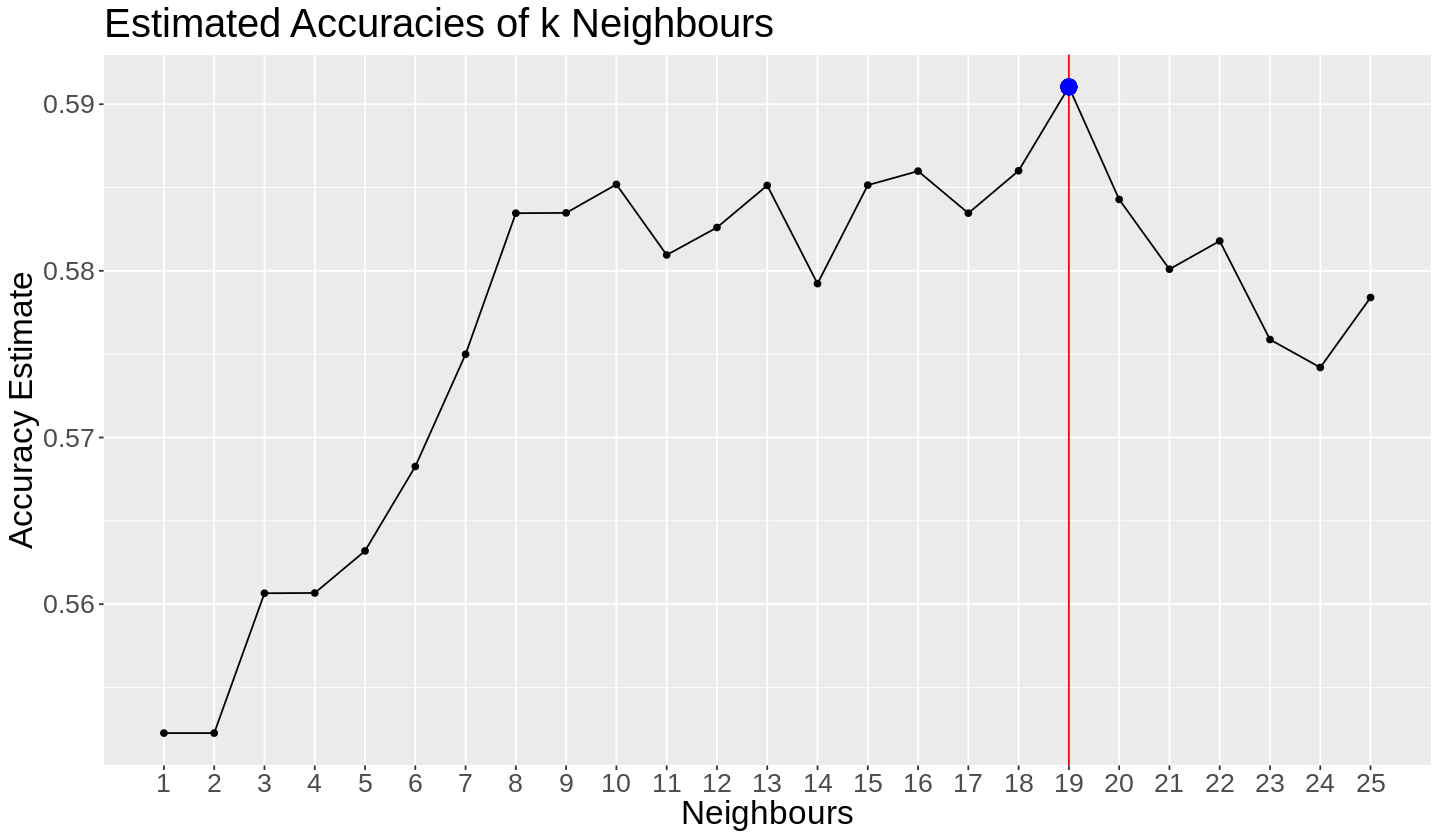

In [22]:
options(repr.plot.width = 12, repr.plot.height = 7)

ky <- wine_results |>
    filter(neighbors == 19) |>
    select(mean) |>
    pull()
ky

cross_val_plot <- wine_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = 19, colour = "red") +
    geom_point(aes(x = 19, y = ky), size = 4, colour = "blue") +
    labs(x = "Neighbours",
         y = "Accuracy Estimate",
         title = "Estimated Accuracies of k Neighbours") +
    scale_x_continuous(limits = c(1, 25),
                       breaks = seq(1, 25),
                       minor_breaks = seq(1, 25, 1)) +
    theme(text = element_text(size = 20),
          plot.caption = element_text(size = 25, hjust = 0))


cross_val_plot

In [23]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
  set_engine("kknn") |>
  set_mode("classification")

wine_fit <- workflow() |>
  add_recipe(upsampled_wine_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = wine_train)

# Get the prediction column
wine_predictions <- predict(wine_fit, wine_test) |> 
    bind_cols(wine_test)

# Compare the accuracy of predictions to the true values in the test set
wine_acc <- wine_predictions |> 
    metrics(truth = quality, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)

wine_acc

# Compare the predictions to the true values in a confusion matrix
wine_cm <- wine_predictions |> 
    conf_mat(truth = quality, estimate = .pred_class)

wine_cm

.metric,.estimate
<chr>,<dbl>
accuracy,0.6209476


          Truth
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   0   0   0   0
         5   2   7 120  44   6   0
         6   1   4  48 112  27   1
         7   1   0   2   9  17   0
         8   0   0   0   0   0   0